# Regression Implementation

Ridge regression refers to
$$
\begin{align}
  \min_{\mathbf w\in \mathbb R^d, b\in \mathbb R} ~ \overbrace{\underbrace{\tfrac{1}{2n} \|X \mathbf w+ b\mathbb 1 - \mathbf y\|_2^2}_{\text{error}} + \lambda \|\mathbf w\|_2^2}^{\text{loss}}
\end{align}
$$
where $X \in \mathbb R^{n \times d}$ and $\mathbf y \in \mathbb R^n$ are the given dataset and $\lambda \geq 0$ is the regularization hyperparameter.
If $\lambda = 0$, then this is the standard linear regression problem.

## Lasso & Ridge

We can implement the Lasso and Ridge regression algorithms using the closed form solution for linear regression.

We first simplify the gradient of the objective function of Ridge and Lasso regression and then apply the gradient descent algorithm to solve the problem.

$$
\begin{align*}
\nabla r_{w_j}&=\frac{\partial r}{\partial \mathbf{w}_j}=\frac{1}{n}\sum_{i=1}^n (X_i\mathbf{w}+b-\mathbf{y}_i)X_{ij}
+2\lambda w_j \\
\nabla r_b&=\frac{\partial r}{\partial b}=\frac{1}{n}\sum_{i=1}^n(X_i\mathbf{w}+b-\mathbf{y}_i) \\
\nabla l_{w_j}&=\frac{\partial l}{\partial \mathbf{w}_j}=\frac{1}{n}\sum_{i=1}^n (X_i\mathbf{w}+b-\mathbf{y}_i)X_{ij}
+\mathrm{sign}(w_j)\lambda \\
\nabla l_b&=\frac{\partial l}{\partial b}=\frac{1}{n}\sum_{i=1}^n(X_i\mathbf{w}+b-\mathbf{y}_i)
\end{align*}
$$


In [ ]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
import math

In [4]:
def ridge(X, y, w, b, lam):
    n = len(y)
    error = LA.norm([np.dot(X[i], w)+b-y[i] for i in range(n)])**2
    return error / n, error / (2 * n) + lam * LA.norm(w)**2

def lasso(X, y, w, b, lam):
    n = len(y)
    error = LA.norm([np.dot(X[i], w)+b-y[i] for i in range(n)])**2
    return error / n, error / (2 * n) + lam * LA.norm(w, ord=1)

def ridge_gd(X, y, w_0, b_0, lam, max_pass, step, tol):
    prev_w = w_0
    prev_b = b_0
    w, b = prev_w, prev_b
    n, d = len(y), len(w)
    error, loss = [], []
    for _ in range(max_pass):
        gr_w, gr_b = np.zeros(d), 0
        for i in range(n):
            s = np.dot(X[i], prev_w) + prev_b - y[i]
            gr_w += s * X[i]
            gr_b += s
        gr_w = np.true_divide(gr_w, n) + 2 * lam * prev_w
        gr_b = gr_b / n
        w = prev_w - step * gr_w
        b = prev_b - step * gr_b
        e_i, l_i = ridge(X, y, w, b, lam)
        error += [e_i]
        loss += [l_i]
        if LA.norm(w - prev_w) <= tol:
            break
        prev_w, prev_b = w, b
    return (w, b, error, loss)

def lasso_gd(X, y, w_0, b_0, lam, max_pass, step, tol):
    prev_w = w_0
    prev_b = b_0
    w, b = prev_w, prev_b
    n, d = len(y), len(w)
    error, loss = [], []
    for _ in range(max_pass):
        gr_w, gr_b= np.zeros(d), 0
        for i in range(n):
            s = np.dot(X[i], prev_w) + prev_b - y[i]
            gr_w += s * X[i]
            gr_b += s
        gr_w = np.true_divide(gr_w, n) + lam * np.sign(prev_w)
        gr_b /= n
        w = prev_w - step * gr_w
        b = prev_b - step * gr_b
        (e_i, l_i) = lasso(X, y, w, b, lam)
        error += [e_i]
        loss += [l_i]
        if LA.norm(w - prev_w) <= tol:
            break
        prev_w, prev_b = w, b
    return (w, b, error, loss)

Now we can train the model on the [housing](http://lib.stat.cmu.edu/datasets/boston) dataset.

In [5]:
housing_X_train = pd.read_csv("datasets/housing_X_train.csv", header=None).to_numpy().transpose()
housing_y_train = pd.read_csv("datasets/housing_y_train.csv", header=None).to_numpy()
housing_X_test = pd.read_csv("datasets/housing_X_test.csv", header=None).to_numpy().transpose()
housing_y_test = pd.read_csv("datasets/housing_y_test.csv", header=None).to_numpy()
scaler = StandardScaler()
housing_X_train = scaler.fit_transform(housing_X_train)
housing_X_test = scaler.fit_transform(housing_X_test)
w_0 = np.zeros(len(housing_X_train[0]))

 lambda  training error  training loss  test error
    0.0        9.694464       4.847232  128.314421
    0.5       20.065103      17.022175  100.552448
    1.0       29.405088      22.335432   90.726443
    1.5       39.285499      27.027855   74.492748
    2.0       54.752823      34.328546   57.690128
    2.5       74.161553      43.581218   48.507929
    3.0       96.248680      54.200119   45.152714
    3.5      129.912463      70.645720   47.322415
    4.0      154.433130      82.558590   52.579943
    4.5      184.907949      97.484230   61.679234
    5.0      223.167829     116.334129   76.079417
    5.5      246.585899     127.790957   86.136091
    6.0      300.958639     154.749388  112.226638
    6.5      333.975905     171.051281  129.519649
    7.0      334.940589     171.345412  129.971681
    7.5      303.870552     155.638415  113.587748
    8.0      251.499668     129.295315   88.421300
    8.5      230.178508     118.489731   79.314015
    9.0      194.157841     100

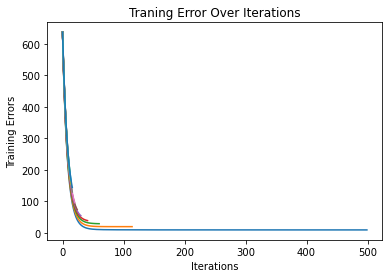

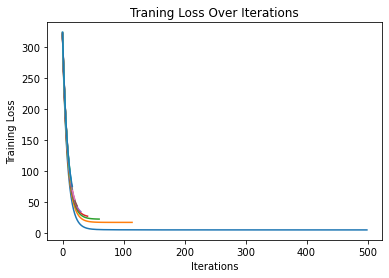

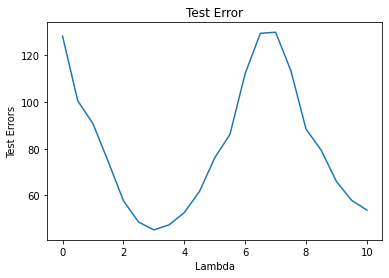

In [6]:
# Run Ridge regression
lam = np.linspace(0, 10, 21)
training_error = []
training_loss = []
test_error = []
start = time.time()
for l in lam:
    (w, b, error, loss) = ridge_gd(housing_X_train, housing_y_train, w_0, 0, l, 500, 0.06, 0.00001)
    # print(w, b)
    te = ridge(housing_X_test, housing_y_test, w, b, l)[0]
    training_loss += [loss]
    training_error += [error]
    test_error += [te]
end = time.time()
plt.figure(1)
for i, l in enumerate(lam):
    plt.plot(training_error[i], label=str(l))
plt.title("Traning Error Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Errors")

plt.figure(2)
for i, l in enumerate(lam):
    plt.plot(training_loss[i], label=str(l))
plt.title("Traning Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")

plt.figure(3)
plt.plot(lam, test_error)
plt.title("Test Error")
plt.xlabel("Lambda")
plt.ylabel("Test Errors")

report = pd.DataFrame(data={'lambda': lam, 'training error': [t[-1] for t in training_error], 'training loss': [t[-1] for t in training_loss], 'test error': test_error})
print(report.to_string(index=False))
print(f"Running time: {end - start} seconds")

 lambda  training error  training loss  test error
    0.0        9.695638       4.847819  128.053196
    0.5       12.125300      10.553855  129.406022
    1.0       13.909974      14.953265  128.960603
    1.5       15.889945      18.774163  128.202135
    2.0       19.017415      22.349695  127.721614
    2.5       20.386224      26.231532  123.695031
    3.0       23.808611      29.592499  118.766851
    3.5       24.527001      33.374873  113.942990
    4.0       32.200888      36.969281  115.943723
    4.5       32.434345      42.458204  109.042929
    5.0       36.730547      43.308850  107.429511
    5.5       51.406781      45.144083  116.397834
    6.0       51.183476      52.407787  108.026441
    6.5       53.673582      56.240017  108.498456
    7.0       61.024029      55.852688  104.842254
    7.5       69.182222      57.597142  114.271971
    8.0       65.777178      67.878429  115.240554
    8.5       53.443610      67.575422  104.930280
    9.0       78.613949      71

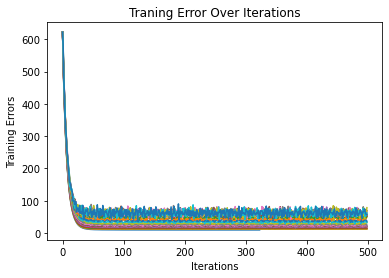

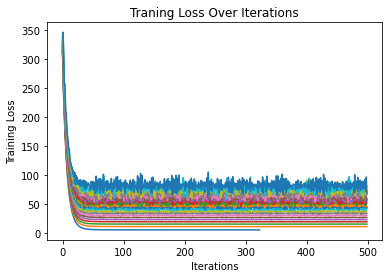

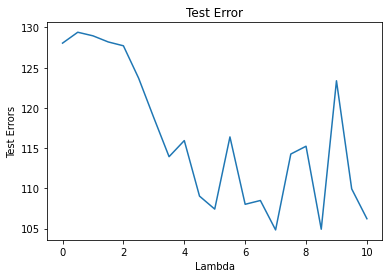

In [7]:
# Run Lasso regression
lam = np.linspace(0, 10, 21)
training_error = []
training_loss = []
test_error = []
start = time.time()
for l in lam:
    (w, b, error, loss) = lasso_gd(housing_X_train, housing_y_train, w_0, 0, l, 500, 0.07, 0.001)
    te = lasso(housing_X_test, housing_y_test, w, b, l)[0]
    training_loss += [loss]
    training_error += [error]
    test_error += [te]
end = time.time()
plt.figure(1)
for i, l in enumerate(lam):
    plt.plot(training_error[i], label=str(l))
plt.title("Traning Error Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Errors")

plt.figure(2)
for i, l in enumerate(lam):
    plt.plot(training_loss[i], label=str(l))
plt.title("Traning Loss Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Training Loss")

plt.figure(3)
plt.plot(lam, test_error)
plt.title("Test Error")
plt.xlabel("Lambda")
plt.ylabel("Test Errors")

report = pd.DataFrame(data={'lambda': lam, 'training error': [t[-1] for t in training_error], 'training loss': [t[-1] for t in training_loss], 'test error': test_error})
print(report.to_string(index=False))
print(f"Running time: {end - start} seconds")

The Ridge regression algorithm is obviously faster than the Lasso algorithm. I think the Ridge regression is better, since it results in smaller test error, used less iterations, and less running time.


## Closed-form solution

The ridge regression can be rewritten as a non-regularized linear regression problem with data augmentation.

$$
\begin{bmatrix}
X & \mathbf{1}_n \\ \sqrt{2\lambda n}I_d & \mathbf{0}_d
\end{bmatrix}
\begin{bmatrix}
\mathbf{w} \\ b
\end{bmatrix} -
\begin{bmatrix}
\mathbf{y} \\ \mathbf{0}_d
\end{bmatrix} =
\begin{bmatrix}
X\mathbf{w}+b\mathbf{1}_n-\mathbf{y} \\ \sqrt{2\lambda n}I_d\mathbf{w}
\end{bmatrix}
$$
$$
\begin{align*}
\min_{\mathbf{w}\in\mathbb{R}^d,\ b\in\mathbb R}\frac{1}{2n}\|
\begin{bmatrix}
X & \mathbf{1}_n \\ \sqrt{2\lambda n}I_d & \mathbf{0}_d
\end{bmatrix}
\begin{bmatrix}
\mathbf{w} \\ b
\end{bmatrix} -
\begin{bmatrix}
\mathbf{y} \\ \mathbf{0}_d
\end{bmatrix}
\|_2^2&=
\min_{\mathbf{w}\in\mathbb{R}^d,\ b\in\mathbb R}\frac{1}{2n}\left[
\sum_{i=1}^n\left|(X\mathbf{w})_i+b-\mathbf{y}_i\right|^2+
\sum_{i=1}^d\left|\sqrt{2\lambda n} \mathbf{w}_i\right|^2\right] \\
&= \min_{\mathbf{w}\in\mathbb{R}^d,\ b\in\mathbb R}\frac{1}{2n}
\sum_{i=1}^n\left|(X\mathbf{w})_i+b-\mathbf{y}_i\right|^2+\frac{2\lambda n}{2n}
\sum_{i=1}^d|\mathbf{w}_i|^2 \\
&=
\min_{\mathbf{w}\in\mathbb{R}^d,\ b\in\mathbb R}\frac{1}{2n}\|
X\mathbf{w}+b\mathbf{1}_n-\mathbf{y}
\|_2^2+\lambda\|
\mathbf{w}
\|_2^2
\end{align*}
$$
which is the same as (1).


Let 
$$
A=
\begin{bmatrix}
X & \mathbf{1}_n \\ \sqrt{2\lambda n}I_d & \mathbf{0}_d
\end{bmatrix},\ \bar{w}=
\begin{bmatrix}
\mathbf{w} \\ b
\end{bmatrix},\ z=
\begin{bmatrix}
\mathbf{y} \\ \mathbf{0}_d
\end{bmatrix}
$$
we have that the regression is basically $\min_{\mathbf{w}\in\mathbb{R}^d,\ b\in\mathbb R}\frac{1}{2n}\|A\bar{w}-z\|_2^2$. We need to find $\bar{w}$ such that the gradient w.r.t $\bar{w}$ is 0. Then the closed-form solution is equivalent to solving
$$
A^TA\bar{w}=A^Tz
$$

In [19]:
def ridge_closed(X, y, lam):
    n, d = len(y), len(X[0])
    I_d = np.identity(d) * (2 * lam * n)**0.5
    A = np.append([np.append(X[i], [1]) for i in range(n)], [np.append(I_d[i], [0]) for i in range(d)], axis=0)
    z = np.append(y, np.zeros((d, 1)), axis=0)
    w_bar = LA.solve(np.matmul(A.transpose(), A), np.matmul(A.transpose(), z))
    return w_bar[:d], w_bar[-1]


Now we test the ridge regression implementation on the [housing](http://lib.stat.cmu.edu/datasets/boston) dataset. 

In [22]:
t_err, t_loss, test_e = [], [], []
for l in lam:
    w, b = ridge_closed(housing_X_train, housing_y_train, l)
    # print(w, b)
    error, loss = ridge(housing_X_train, housing_y_train, w, b, l)
    t_err += [error]
    t_loss += [loss]
    test_e += [ridge(housing_X_test, housing_y_test, w, b, l)[0]]

report = pd.DataFrame(data={'lambda': lam, 'training error': t_err, 'training loss': t_loss, 'test error': test_e})
print(report.to_string(index=False))

 lambda  training error  training loss  test error
    0.0        9.694299       4.847149  128.402660
    0.5       20.064503      17.021960  100.868575
    1.0       29.061284      22.163595   99.312748
    1.5       35.677212      25.223765   99.818711
    2.0       40.676822      27.290609  100.762514
    2.5       44.585337      28.793159  101.770940
    3.0       47.728889      29.940256  102.735091
    3.5       50.315598      30.847330  103.623472
    4.0       52.483823      31.583960  104.430851
    4.5       54.329118      32.194830  105.161285
    5.0       55.919675      32.710068  105.821842
    5.5       57.305531      33.150778  106.420146
    6.0       58.524283      33.532220  106.963434
    6.5       59.604760      33.865712  107.458227
    7.0       60.569457      34.159843  107.910262
    7.5       61.436200      34.421246  108.324529
    8.0       62.219304      34.655137  108.705348
    8.5       62.930405      34.865669  109.056454
    9.0       63.579061      35

I think gradient descent is better than the closed-form solution, since the training errors and training losses are pretty close, while the gradient descent has must less test errors comparing to the closed-form solution.
